# Tarea 7

Fecha de entrega: 7/Septiembre/2017

Por _Diana López Angeles_

In [1]:
#Las librerias que vamos a usar en nuestro codigo:
using SymPy
using PyPlot
x = Sym("x"); 

### Ejercicio 3: Método de Simpson
----

In [22]:
function f(x)    #Proponemos una función que es a la que le vamos a aplicar el metodo de integración.
    -sin(x)
end;

In [3]:
#Lo mismo que en la tarea 6. Lo unico que varia es la linea donde se hace el metodo de Simpson.

function metodo_simpson(f,a,b,subintervalos)           
    N = subintervalos                                  
    A = a
    B = b
    datos = []                                         
    suma = 0                                           
    area_bajo_la_curva = 0

    for i in 1:N
        b = ((B-A)/N)*(i) - A
        a = A + ((B-A)/N)*(i-1)
        area_bajo_la_curva = (b-a)/6*((f(a)+4f((a+b)/2))+f(b))   #aqui se hace el Metodo de Simpson
        push!(datos,area_bajo_la_curva)
    end
    suma = sum(datos,1:N)
    print("La aproximacion por metodo de Simpson con ",subintervalos," subintervalos es: ",suma)
end;

In [4]:
metodo_simpson(f,0,1,100)

La aproximacion por metodo de Simpson con 100 subintervalos es: [-0.459698]

### Ejercicio 4: Interpolacion polinomial Lagrange

In [5]:
function interpolacion_polinomial(a,b,punto_evaluar)
    las_equis = collect(a)                      #Vamos a poner variables donde se guarden los datos tanto de a como de b con la función collect
    las_ye = collect(b)
    x = Sym("x")                                #Nuestra variable simbolica
    L=0                                         #Nos combiene nombrar esta variable pues aqui haremos nuestra suma y obtendremos el polinomio interpolador.
    
    #Para poder hacer la interpolacion vamos a tener que poner un if dentro de un while y este anterior dentro de un for.
    #j nos va ir dando la base polinomica, pero debemos tener unas cuantas reestricciones para que todo el proceso se realice correctamente.
    #m tiene que ser distinto de j, por eso si m=j en el if se le sumara 1, si esta es diferente simplemente se sigue el ciclo y se realiza la interpolación.
    
    for j in 1:length(las_equis)
        m = 1
        l = 1
        while m<=length(las_equis)
           if m==j
           m = m+1
           else
            l = l*(x-las_equis[m])/(las_equis[j]-las_equis[m])     #Aquí se hace la interpolacion polinomial de Lagrange.
            m = m+1
           end
        end
        L = L + las_ye[j]*l                                       #Aqui se forma nuestro polinomio interpolador.
    end
    
    L = simplify(L);

    polinomio_final =lambdify(L,[x])                              #Con lamdify convertimos el polinomio en una función de julia.

    return polinomio_final(punto_evaluar)                         #Que nos regrese el polinomio evaluado en el punto que queramos.            
    
    end;

### Función: coseno
-------

In [6]:
a1 = linspace(0,2*pi,10);         #Nuestra lista de equis.
b1 = cos.(a1);                     #Nuestra funcion evaluada en las equis.

In [59]:
interpolacion_coseno = lambdify(interpolacion_polinomial(a1,b1,Sym("x")),[x])
otras_equis = linspace(0,2*pi,100);                   #Los puntos que queremos que grafique del polinomio.
otras_ye = interpolacion_coseno.(otras_equis);        #Las equis evaluadas en el polinomio interpolador.

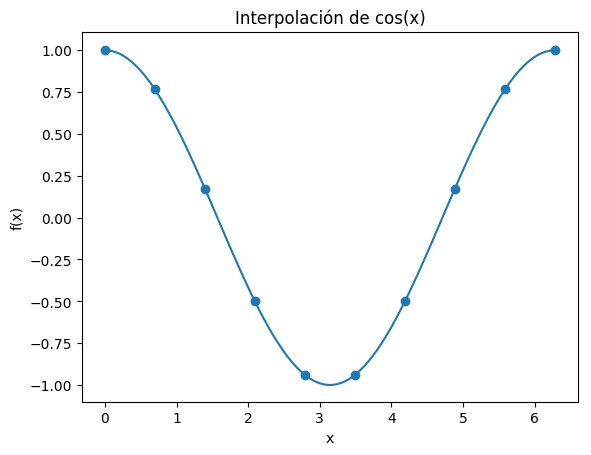

In [8]:
xlabel("x")                         #Ponemos nombre a los ejes
ylabel("f(x)")
title("Interpolación de cos(x)")    #Nombre a nuestra grafica.
scatter(a1,b1)                        #Aqui graficamos los puntos del linspace.
plot(otras_equis, otras_ye)         #Aqui se grafica el polinomio interpolado.
show();                             #Que lo muestre.

In [9]:
#Finalmente nuestro polinomio del coseno de forma explicita:
interpolacion_polinomial(a1,b1,Sym("x"))

                     9                        8                         7     
5.6920614055489e-18*x  - 1.97979336359535e-5*x  + 0.000497576342935013*x  - 0.

                   6                        5                       4         
00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.0201

              3                      2                            
425548285172*x  - 0.512543349763835*x  + 0.003132547207505*x + 1.0

### Funcion: coseno cuadrado
-----

In [10]:
#Vamos a tener que definir la funcion coseno cuadrado para evitarnos de problemas de no poder multiplicar vectores

function coseno_cuadrado(x)
    return cos(x)*cos(x)
    end;

In [11]:
a2 = linspace(0,2*pi,10);         #Nuestra lista de equis.
b2 = coseno_cuadrado.(a2);        #Nuestra funcion evaluada en las equis.

In [12]:
interpolacion_coseno_cuadrado = lambdify(interpolacion_polinomial(a2,b2,Sym("x")),[x])
otras_equis = linspace(0,2*pi,100);                            #Los puntos que queremos que grafique del polinomio.
otras_ye = interpolacion_coseno_cuadrado.(otras_equis);        #Las equis evaluadas en el polinomio interpolador.

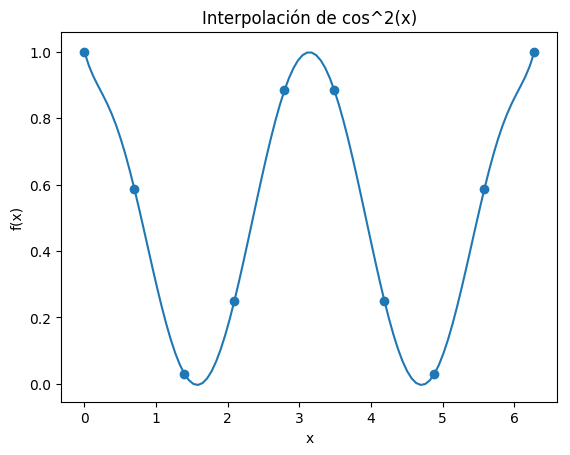

In [13]:
xlabel("x")                           #Ponemos nombre a los ejes
ylabel("f(x)")
title("Interpolación de cos^2(x)")    #Nombre a nuestra grafica.
scatter(a2,b2)                        #Aqui graficamos los puntos del linspace.
plot(otras_equis, otras_ye)           #Aqui se grafica el polinomio interpolado.
show();                               #Que lo muestre.

In [14]:
#Finalmente nuestro polinomio del coseno cuadrado de forma explicita:
interpolacion_polinomial(a2,b2,Sym("x"))

                        9                        8                       7    
- 2.60208521396521e-18*x  + 0.00125598518133155*x  - 0.0315663505495105*x  + 0

                  6                    5                     4                
.313492883032325*x  - 1.5475381373856*x  + 3.89900431361716*x  - 4.56959608798

     3                     2                            
485*x  + 2.02232704563068*x  - 0.784017877200952*x + 1.0

### Interpolacion de puntos dados [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]
-----

In [15]:
a3 = [0,2,3,4,5,6,7];
b3 = [10,-10,-4,0,5,20,-1];

In [16]:
interpolacion_puntos_dados = lambdify(interpolacion_polinomial(a3,b3,Sym("x")),[x])
otras_equis = linspace(0,7,100);                            #Los puntos que queremos que grafique del polinomio.
otras_ye = interpolacion_puntos_dados.(otras_equis);        #Las equis evaluadas en el polinomio interpolador.

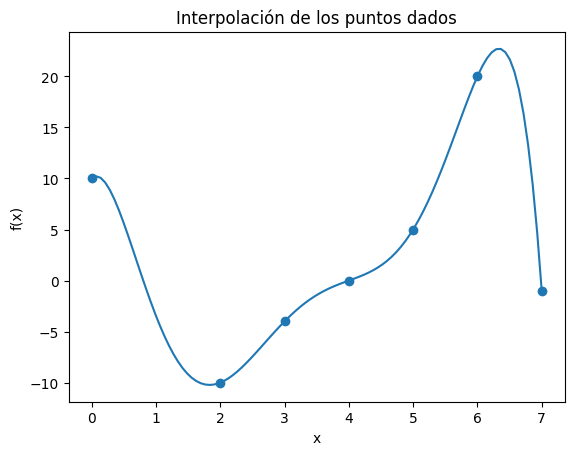

In [17]:
xlabel("x")                                      #Ponemos nombre a los ejes
ylabel("f(x)")
title("Interpolación de los puntos dados")       #Nombre a nuestra grafica.
scatter(a3,b3)                                   #Aqui graficamos los puntos del linspace.
plot(otras_equis, otras_ye)                      #Aqui se grafica el polinomio interpolado.
show();                                          #Que lo muestre.

In [18]:
#Finalmente nuestro polinomio para los puntos es:
interpolacion_polinomial(a3,b3,Sym("x"))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

### Ejercicio 6: Comparar convergencia de metodos de integración

In [19]:
#Copiemos nuestros codigos de la tarea 6 y les haremos pequeñas modificaciones para poder obtener listas y así gráficar.

function sumas_Riemann(f,a,b,subintervalos)            #Definimos nuestra función
    N = subintervalos                                  #Re-definimos nuetras variables que entran en la función.
    A = a
    B = b
    datos = []                                         #Ponemos una lista para que aqui más tarde guardemos nuestras sumas.
    suma = 0                                           #Ponemos estas variables igual a cero para poder usarla despues en el ciclo.
    area_bajo_la_curva = 0

    for i in 1:N                                       #Un ciclo for para obtener el área de los N-subintervalos
        b = ((B-A)/N)*(i) - A                          
        a = A + ((B-A)/N)*(i-1)
        area_bajo_la_curva = (b-a)*(f((b+a)/2))        #Aqui se hace la suma de Riemann.
        push!(datos,area_bajo_la_curva)                #Con este push guardamos las áreas en nuestra lista de datos.
    end
    suma = sum(datos,1:N)                              #Aqui se hacen las sumas de los n-subintervalos guardados en la lista de datos.
    return suma
end;

function metodo_trapecio(f,a,b,subintervalos)            
    N = subintervalos                                  
    A = a
    B = b
    datos = []                                         
    suma = 0                                            
    area_bajo_la_curva = 0

    for i in 1:N
        b = ((B-A)/N)*(i) - A
        a = A + ((B-A)/N)*(i-1)
        area_bajo_la_curva = (b-a)*((f(b)+f(a))/2)     #Aquí se hace el método del trapecio.
        push!(datos,area_bajo_la_curva)
    end
    suma = sum(datos,1:N)
    return suma
end;

function metodo_simpson_(f,a,b,subintervalos)           
    N = subintervalos                                  
    A = a
    B = b
    datos = []                                         
    suma = 0                                           
    area_bajo_la_curva = 0

    for i in 1:N
        b = ((B-A)/N)*(i) - A
        a = A + ((B-A)/N)*(i-1)
        area_bajo_la_curva = (b-a)/6*((f(a)+4f((a+b)/2))+f(b))   #aqui se hace el Metodo de Simpson
        push!(datos,area_bajo_la_curva)
    end
    suma = sum(datos,1:N)
    return suma
end;

In [62]:
function convergencia(f,a,b,subintervalos)
    N = collect(subintervalos)
    y_riemann = []                #Listas vacias en las que guardaremos los datos que graficaremos más tarde
    y_trapecio = []
    y_simpson = []
    R = 0.0                       #Nos combiene nombrar estas pues las usaremos en el for
    T = 0.0
    S = 0.0
    for i in 1:length(N)      #Ciclo for, para que en cada numero de particiones se generen nuevos valores que dan a las listas con el push
        R = sumas_Riemann(f,a,b,N[i])
        T = metodo_trapecio(f,a,b,N[i])
        S = metodo_simpson_(f,a,b,N[i])
        push!(y_riemann,R)
        push!(y_trapecio,T)
        push!(y_simpson,S)
    end

    #Ahora viene lo chido, haha, es decir la grafica:
    xlabel("1/Δx")
    ylabel("Integral de f(x)")
    title("Convergencia al valor exacto de la integral")
    plot(N/(b-a),y_riemann,color="#ff69b4")     #Metodo de Riemann.
    plot(N/(b-a),y_trapecio,color="#66cdaa")    #Metodo del trapecio.
    plot(N/(b-a),y_simpson,color="#9acd32")     #Metodo de Simpson.
    show()
end;

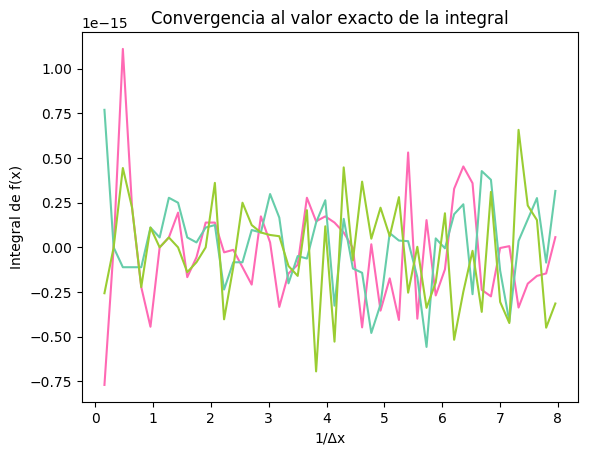

In [63]:
convergencia(f,0,2*pi,1:50)

#### Podemos ver que no podemos saber cual converge primero, pues en los tres metodos conforme se van agregando más subintervalos esta lo unico que hace es oscilar en el valor verdadero de la integral, es decir, 0.